In [111]:
import os
# from numba import jit
# from tqdm import tqdm

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors as colors 
from matplotlib import cm

# from my_utilities.data import get_data
from my_utilities.data import get_phipsi_dict_from_dataframe
from my_utilities.ramachandran import get_ramachandran, plot_ramachandran
from my_utilities.svd import SVD_representation
# from my_utilities.density.vec import get_trivial_vec_density, get_linear_interpolator
# from my_utilities.metrics import log_likelihood

from my_utilities.constants import AMINOACIDS, aminoacid_name_from_1l

In [83]:
AA_RAMACHANDRAN_DATA_PATH = "./my_cache/aa_ramachandran_data.pkl"
EXCLUDED_VOLUME_MASK_PATH = "./pyrosetta/exclmap256_30.csv"

In [108]:
!ls ./dat_files1/ | wc -l

6440


In [75]:
data_raw = pd.read_pickle(AA_RAMACHANDRAN_DATA_PATH)

In [76]:
len(data_raw)

2420123

In [86]:
data1 = data_raw[data_raw["aa_1l"].isin(AMINOACIDS)]

In [87]:
len(data1)

2420055

In [89]:
excluded_volume_mask = ~pd.read_csv(EXCLUDED_VOLUME_MASK_PATH).to_numpy()
n = excluded_volume_mask.shape[0]
dx = 2 * np.pi / n
data1["outlier"] = data1.apply(lambda row:
                            ~ excluded_volume_mask[
                                tuple(((np.array([row["phi"],row["psi"]]) + np.pi) // dx).astype(int))
                            ],
                            axis=1)

/tmp/ipykernel_712091/2991999307.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["outlier"] = data1.apply(lambda row:


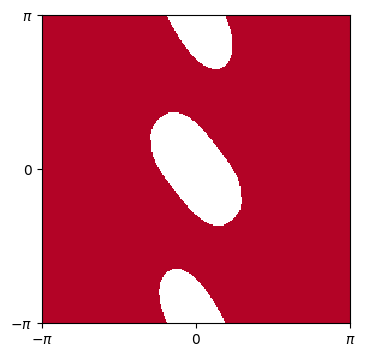

In [123]:
# plot_ramachandran(excluded_volume_mask)
arr = excluded_volume_mask
plt.figure(figsize=(4,4))
plt.imshow(np.transpose(arr),
           origin="lower",
           norm=colors.LogNorm(vmin=arr.min(), vmax=arr.max()),
           cmap=cm.coolwarm,
           interpolation="none")
n = arr.shape[0]
plt.xticks(ticks=[-0.5,n/2-0.5,n-0.5], labels=["$-\pi$", "0", "$\pi$"])
plt.yticks(ticks=[-0.5,n/2-0.5,n-0.5], labels=["$-\pi$", "0", "$\pi$"])
plt.show()

#  'none', 'antialiased', 'nearest', 'bilinear', 'bicubic', 'spline16', 'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric', 'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos', 'blackman'.

In [96]:
data1[["outlier","pdb_code"]].groupby("outlier").count()

,pdb_code
outlier,
False,2419883
True,172


In [97]:
data = data1[~data1["outlier"]]

In [99]:
len(data)

2419883

In [126]:
stats_pp

,pdb_code
aa_1l,
L,10937
A,8537
V,8394
G,7709
T,7648
D,7467
I,7071
S,6657
N,6227


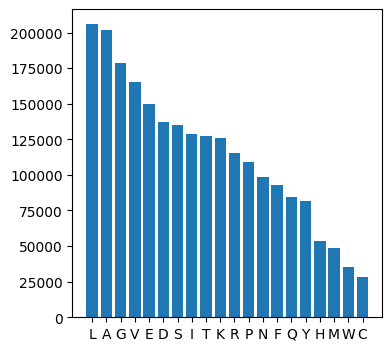

In [105]:
stats_npp = data[~data["preproline"]] \
                [["aa_1l","pdb_code"]] \
                .groupby(["aa_1l"]) \
                .count().sort_values("pdb_code", ascending=False)

plt.figure(figsize=(4,4))
plt.bar(stats_npp.index, stats_npp["pdb_code"].values)
plt.show()

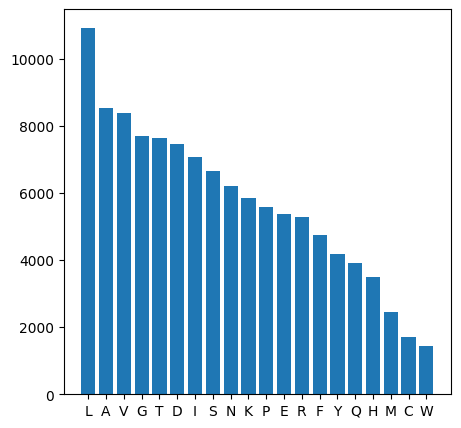

In [104]:
stats_pp = data[data["preproline"]] \
               [["aa_1l","pdb_code"]] \
               .groupby(["aa_1l"]) \
               .count().sort_values("pdb_code", ascending=False)

plt.figure(figsize=(5,5))
plt.bar(stats_pp.index, stats_pp["pdb_code"].values)
plt.show()